WNBA Player Stats Season 16-17 <br>
https://www.kaggle.com/jinxbe/wnba-player-stats-2017/home <br>

Content

Stats from all games of season 2016-2017

    G = Games Played
    MIN = Minutes Played
    FGM = Field Goals Made
    FGA = Field Goals Attempts
    FG% = Field Goals %
    3PM = 3Points Made
    3PA = 3Points Attempts
    3P% = 3Points %
    FTM = Free Throws made
    FTA = Free Throws Attempts
    FT% = Free Throws %
    OREB = Offensive Rebounds
    DREB = Defensive Rebounds
    REB = Total Rebounds
    AST = Assists
    STL = Steals
    BLK = Blocks
    TO = Turnovers
    PTS = Total points
    DD2 = Double doubles
    TD3 = Triple doubles


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline
plt.style.use( 'ggplot' )
sns.set_style( 'white' )

In [7]:
wnba = pd.read_csv('WNBA Stats.csv')

In [4]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [5]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [6]:
wnba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 32 columns):
Name            143 non-null object
Team            143 non-null object
Pos             143 non-null object
Height          143 non-null int64
Weight          142 non-null float64
BMI             142 non-null float64
Birth_Place     143 non-null object
Birthdate       143 non-null object
Age             143 non-null int64
College         143 non-null object
Experience      143 non-null object
Games Played    143 non-null int64
MIN             143 non-null int64
FGM             143 non-null int64
FGA             143 non-null int64
FG%             143 non-null float64
15:00           143 non-null int64
3PA             143 non-null int64
3P%             143 non-null float64
FTM             143 non-null int64
FTA             143 non-null int64
FT%             143 non-null float64
OREB            143 non-null int64
DREB            143 non-null int64
REB             143 non-null int64
AST

Take one measure of the sampling error.

- Use the `Games Played` column to find the maximum number of games played by a player in the season 2016-2017. The data set contains all the players that had at least one game, so it's a population relative to our question. Find this parameter, and assign the result to a variable named `parameter`.
- Using the `Series.sample() method`, sample randomly 30 players from the population, and assign the result to a variable named `sample`.
     - When calling `Series.sample()`, use the the argument `random_state = 1`. 
- Find the maximum number of games using the sample, and assign the result to a variable named `statistic`.
- Measure the sampling error, and assign the result to a variable named `sampling_error`.

In [8]:
game=wnba['Games Played']
parameter=game.max()
sample=game.sample(30,random_state=1)
statistic=sample.max()
sampling_error= parameter - statistic

In [9]:
sampling_error

2

## Simple Random Samling
If we sampled to measure the mean height of adults in the US, we'd like to our sample statistic (sample mean height) to get as close as possible to the population's parameter (population mean height). <br>
If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. 
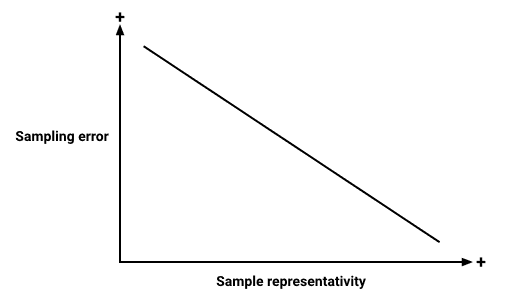

Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.

- Using simple random sampling, take 100 samples from our WNBA data set, and for each sample measure the average points scored by a player during the 2016-2017 season. For each of the 100 iterations of a for loop:
        - Sample 10 values from the PTS column.
        - Compute the mean of this sample made of 10 values from the PTS column, and append the result to a list.
        - To make your results reproducible, vary the random_state parameter of the sample() method with values between 0 and 99. For the first iteration of the for loop, random_state should equal 0, for the second iteration should equal 1, for the third should equal 2, and so on.

- Display the discrepancy between the parameter of interest (the mean of the PTS column) and the statistics obtained in the previous step.
        - Using plt.scatter(), display all the 100 sample means using a scatter plot. For the x-axis, use integers from 1 to 100 to designate the sample number. Use the y-axis for the sample means.
        - 
        Using plt.axhline(), draw a horizontal line that represents the average number of points in the population.


In [10]:
sample_means=[]
for i in range(100):
    sample = wnba['PTS'].sample(10,random_state=i)
    mean=sample.mean()
    sample_means.append(mean)

In [11]:
len(sample_means)

100

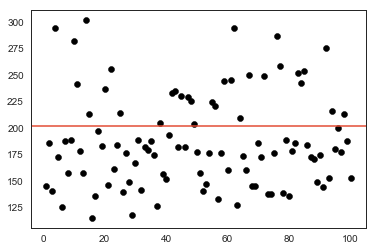

In [17]:
plt.scatter(range(1,101),sample_means,c='k')
plt.axhline(y=pop_mean)

In [14]:
pop_mean=wnba['PTS'].mean()

In [19]:
pop_mean

201.7902097902098

In [15]:
sampling_errors=[x-pop_mean for x in sample_means]

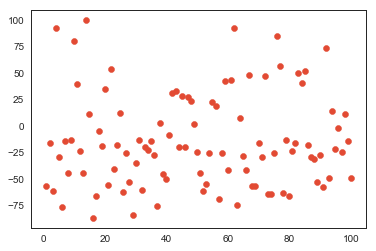

In [18]:
plt.scatter(range(1,101),sampling_errors)

From the scatter plot in the last screen, we can notice that the sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases. 
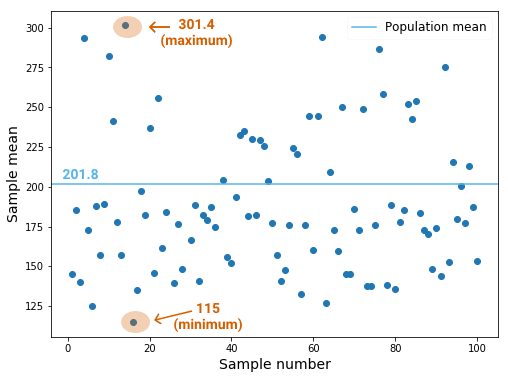

Because sample means vary a lot around the population mean, there's a good chance we get a sample that is not representative of the population:
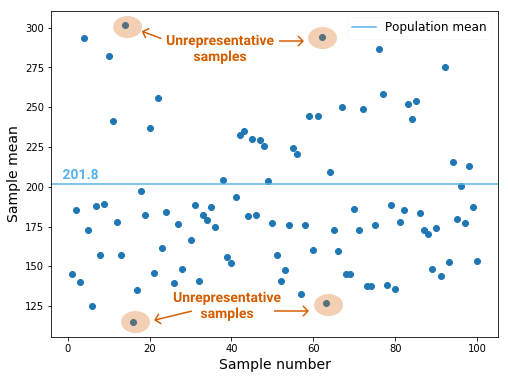


20
[]
[195.35, 184.1, 145.55, 250.05, 182.9, 202.7, 247.1, 164.45, 244.7, 256.3] 



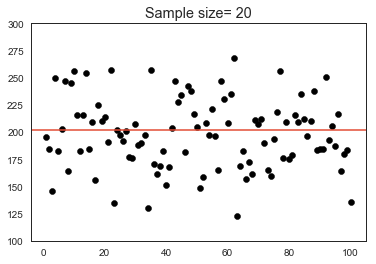

40
[]
[207.45, 193.55, 169.1, 226.025, 183.525, 199.7, 209.85, 183.95, 224.025, 241.3] 



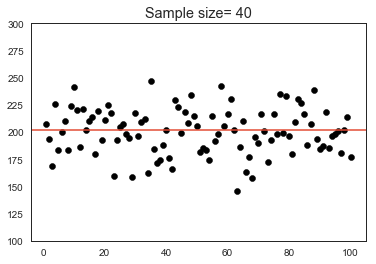

60
[]
[205.4, 186.2, 170.93333333333334, 203.93333333333334, 194.28333333333333, 190.75, 191.4, 208.48333333333332, 227.41666666666666, 228.33333333333334] 



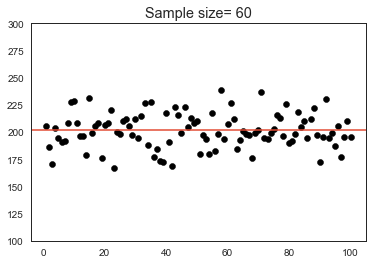

80
[]
[194.425, 196.95, 178.1375, 205.0875, 180.4, 182.75, 190.0625, 192.1, 211.375, 228.85] 



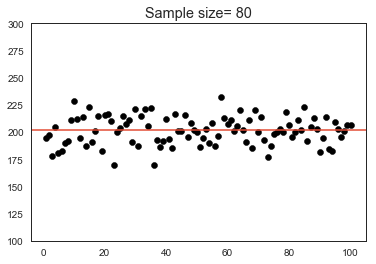

100
[]
[195.57, 203.01, 185.48, 201.89, 188.61, 198.83, 192.48, 198.1, 215.96, 211.11] 



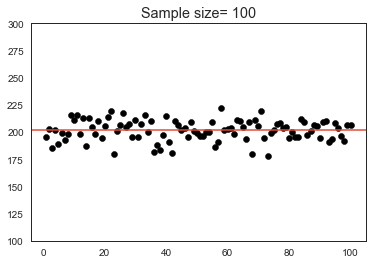

In [32]:

for size in [20,40,60,80,100]:
    print (size)
    sample_means=[]
    print (sample_means)
    for i in range(100):
        sample = wnba['PTS'].sample(size,random_state=i)
        mean=sample.mean()
        sample_means.append(mean)
    print (sample_means[:10],'\n')  
    plt.scatter(range(1,101),sample_means,c='k',)
    plt.axhline(y=201.790)
    plt.ylim((100,300))
    s = 'Sample size= '+ str(size)
    plt.title(s)
    plt.show()

We can easily observ that sample means tend to vary less and less around the population mean as we increase the sample size. 
- Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean. It is possible that we get an unrepresentative sample.
- When we do simple random sampling, we should try to get a sample that is as large as possible. 
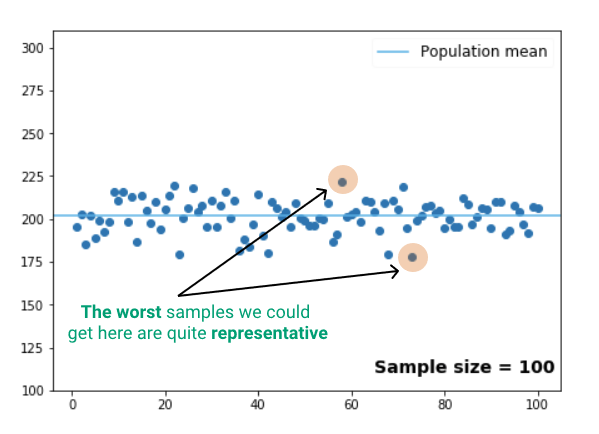

## Stratified Sampling
E.g players in basketball play in different positions on the court. The metrics of a player (number of points, number of assists etc) depend on their position. If we perform simple random sampling, there could be chances that some categories won't be included in our sample. 

In [35]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

Thus, the downside of simple random sampling is that it can leave out individuals playing in a certain position on the field. 
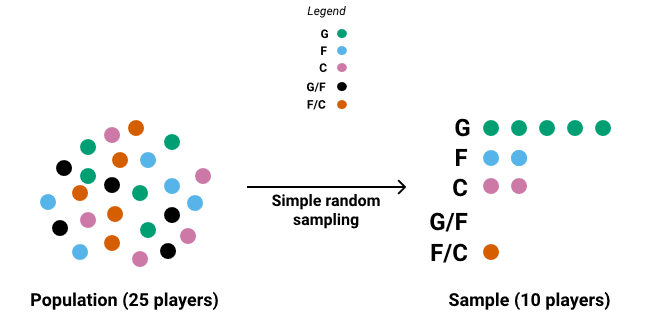

Rather, we can perform simple random sampling for each 'position'.
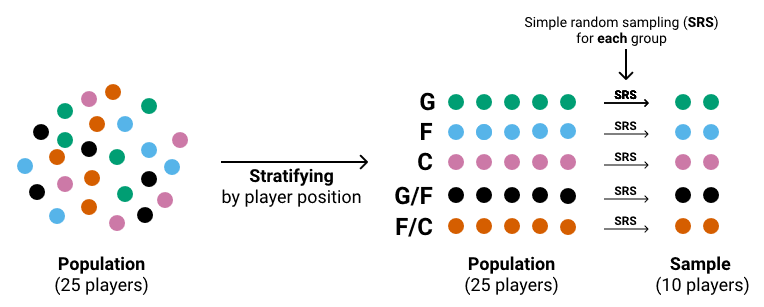

Perform stratified sampling: stratify the data set by player position, and then do simple random sampling on every stratum. At the end, use the sample to find which position has the greatest number of points per game.

- Create a new column which describes the number of points a player scored per game during the season. The number of total points a player scored the entire season is stored in the `PTS` column, and the number of games played in the `Games Played` column. Give the new column a relevant name.
- Stratify the `wnba` data set by player position. The Pos column describes a player's position on the field. Assign each stratum to a different variable.
- Loop through the strata, and for each stratum:
        Sample 10 observations using simple random sampling (set `random_state = 0`).
        Find the mean points per game using the sample. Use the new column you've created earlier.
        Find a way to store the mean along with its corresponding position. You can use a dictionary.
- Find the position that has the greatest number of points per game, and assign its name to a variable named `position_most_points`.

In [36]:
wnba['Pts_per_game']=wnba['PTS']/wnba['Games Played']

In [38]:
pos=list(wnba['Pos'].unique())

In [40]:
# Stratifying the data in five strata
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),
                (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) # simple random sapling on each stratum
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [41]:
position_most_points

'C'

In [42]:
points_per_position

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

In [44]:
points_per_position.get('G')

7.092926195632343

In [45]:
points_per_position.items()

dict_items([('G', 7.092926195632343), ('F', 8.702175158545568), ('C', 9.833761394334251), ('G/F', 6.817264935760487), ('F/C', 9.059118773946361)])

In [47]:
max(points_per_position.values())

9.833761394334251

In [48]:
wnba['Games Played'].min()

2

In [49]:
wnba['Games Played'].max()

32

In [50]:
wnba['Games Played'].value_counts()

29    30
30    25
28    10
27     8
25     7
23     7
22     6
26     6
31     5
24     5
14     4
20     4
18     3
4      3
7      3
17     2
16     2
15     2
10     2
21     2
32     1
5      1
19     1
8      1
9      1
12     1
2      1
Name: Games Played, dtype: int64

In [51]:
wnba['Games Played'].value_counts(bins=3,normalize=True)

(22.0, 32.0]     0.727273
(12.0, 22.0]     0.181818
(1.969, 12.0]    0.090909
Name: Games Played, dtype: float64

Approximately 72.7% of the players had played more than 23 games for the 2016-2017 season. <br>
When we compute the mean of the total points using the population (the entire data set), the mean will probably be significantly influenced by those 72.7% players who played more than 23 games. When sample randomly, the sample could have the proportion is different than in the population. <br>
E.g we might end up with a sample where only 2% of the players played more than 23 games. This will result in a sample mean which underestiamtes the population mean. 
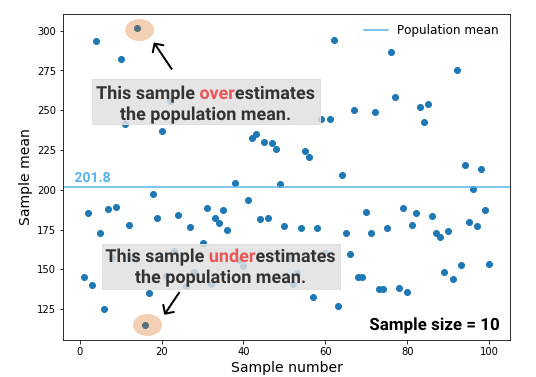

## Proportional Stratified Sampling
Perform stratified sampling on the data set 100 times, and sample strata proportionally.

- Stratify the data set by the number of games played in the following way: 
    - the first strata should be composed of players that played 12 games or less; 
    - the second of players that played more than 12 games, but up to 22 (included); 
    - and the third of players that played more than 22 games (22 not included).
- Perform stratified sampling 100 times. For each of the 100 iterations of a for loop:
    - Sample each stratum proportionally. Sample at random: 
        - one sample observation from the first stratum, 
        - two sample observations from the second, and 
        - seven sample observations from the third stratum.
    - random_state should vary from 0 to 99: 0 for the first iteration, 99 for the last iteration.
    - Once you're done with the sampling for the current iteration of the loop, concatenate all the sample observations into one final sample. You can use `pd.concat()`.
    - Compute the mean of the final sample, and append it to a list defined outside the loop. The mean should be for the `PTS` column.

In [59]:
strata_1 = wnba[wnba['Games Played']<=12]
strata_2 = wnba[(wnba['Games Played']>12) & (wnba['Games Played']<=22)]
strata_3 = wnba[wnba['Games Played']>22]

sample_means = []

for i in range(100):
    s1 = strata_1['PTS'].sample(1,random_state=i)
    s2 = strata_2['PTS'].sample(2,random_state=i)
    s3 = strata_3['PTS'].sample(7,random_state=i)
    sample_s = pd.concat([s1,s2,s3],ignore_index=True)
    sample_mean=sample_s.mean()
    sample_means.append(sample_mean)

In [60]:
sample_means[:10]

[185.9, 163.6, 176.0, 305.1, 241.1, 200.1, 272.5, 170.5, 190.5, 138.4]

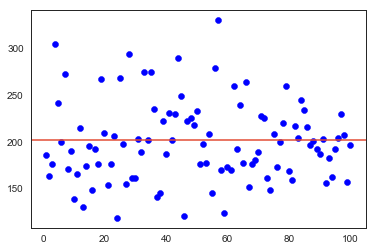

In [61]:
plt.scatter(range(1,101),sample_means,c='b')
plt.axhline(pop_mean)

However, this may not seem to be improved a lot comapred to simple random sampling. The variability of the sampling is still quite large. Many sample means are unrepresentative, and far from the population mean.
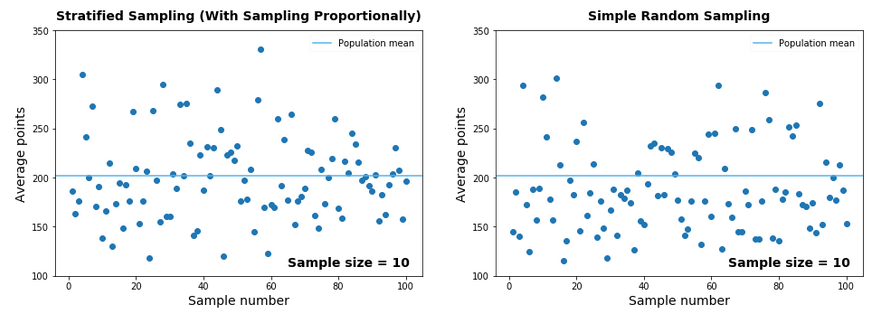

The poor performance is due to poor choice of strata. We stratified the data by the number of games played, however, this is not a good approach. A player is considered as having played one game even if she only played for one or two minutes. E.g others play 30 or 40 minitues, and they are still counted as having played one game. <br>
It makes more sense to stratify the data by number of minutes played, rather than by number of games palyed. The minutes played are a much better indicator of how much a player scored in a season than the number of games played. <br>
If we make strata based on minutes played, and then sample proportionally using stratified sampling, we get something visibly better than simple random sampling (especially in terms of variability):
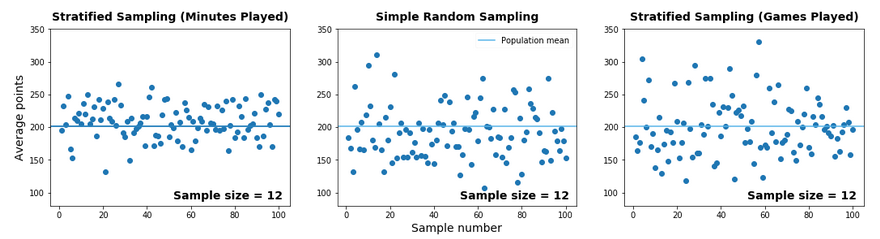

Guidelines for choosing good strata:
1. **Minimize the variability within each stratum**
If the variability is high, a more granular stratification (more strata) might be needed, or need change the **criterion** of stratification

2. **Maximize the variability between strata**
Good strata are different from one another. 

3. The stratification criterion should be strongly correlated with the property you are trying to measure. 
E.g minutes played should be strongly correlated with the number of total points (target). 

## Cluster Sampling

A common problem people faced in data science flow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming , or close to impossible. <br>
E.g you want to analyze how people review and rate movies as a function of movie budget. There are a lot of websites out there that can help with data collection, but how can you go about so that you can spend one day or two on getting the data you need, rather than one month or two? <br>
One way is to list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called **cluster sampling** and each of the individual data source is called a **cluster**.
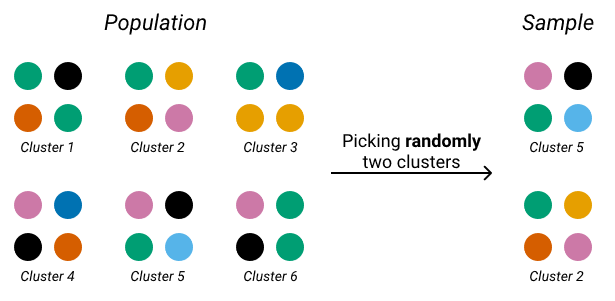

In [62]:
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [66]:
clusters=pd.Series(wnba['Team'].unique()).sample(4,random_state=0)

In [67]:
sample = pd.DataFrame()
for cluster in clusters:
    data_collected=wnba[wnba['Team']==cluster]
    sample = sample.append(data_collected)

In [68]:
sample

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game
6,Alexis Prince,PHO,G,188,81.0,22.917610,US,"February 5, 1994",23,Baylor,...,14,15,5,4,3,3,24,0,0,1.500000
15,Angel Robinson,PHO,F/C,198,88.0,22.446689,US,"August 30, 1995",21,Arizona State,...,42,58,8,1,11,16,58,0,0,3.866667
25,Brittney Griner,PHO,C,206,93.0,21.915355,US,"October 18, 1990",26,Baylor,...,129,172,39,13,54,52,461,6,0,20.954545
27,Camille Little,PHO,F,188,82.0,23.200543,US,"January 18, 1985",32,North Carolina,...,71,113,42,28,13,50,228,0,0,7.600000
32,Cayla George,PHO,C,193,87.0,23.356332,AU,"April 20, 1987",30,Georgia,...,71,81,15,9,11,13,100,1,0,3.571429
42,Danielle Robinson,PHO,G,175,57.0,18.612245,US,"October 5, 1989",27,Oklahoma,...,73,86,106,33,4,58,209,0,0,7.464286
45,Diana Taurasi,PHO,G,183,74.0,22.096808,US,"November 6, 1982",34,Connecticut,...,98,129,32,20,31,28,376,3,0,18.800000
48,Emma Cannon,PHO,F,188,86.0,24.332277,US,"January 6, 1989",28,Central Florida,...,72,105,52,21,27,30,252,1,0,14.000000
86,Leilani Mitchell,PHO,G,165,58.0,21.303949,US,"June 15, 1985",32,Utah,...,57,69,108,26,9,50,233,0,0,7.766667
95,Monique Currie,PHO,G/F,183,80.0,23.888441,US,"February 25, 1983",34,Duke,...,103,122,67,22,11,48,364,0,0,11.375000


In [69]:
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [70]:
print (sampling_error_height,sampling_error_age ,sampling_error_BMI,sampling_error_points)

-0.06400121617511445 -1.401337792642142 0.23095444165950596 -27.79674673152934


In [71]:
wnba['PTS'].mean()

201.7902097902098

In [72]:
sample['PTS'].mean()

229.58695652173913

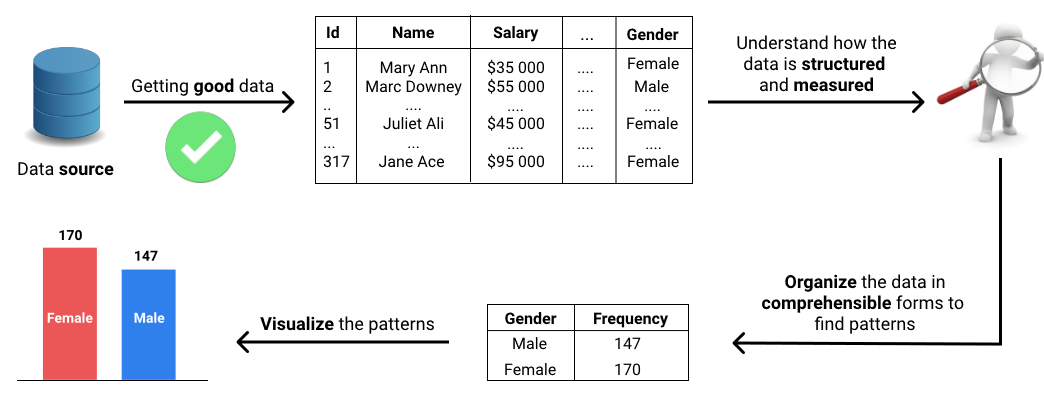

# Variables in Statistics
## Scales of Measurement
The amount of information a variable provides depends on its nature (whether it's quantitative or qualitative), and on the way it's measured.
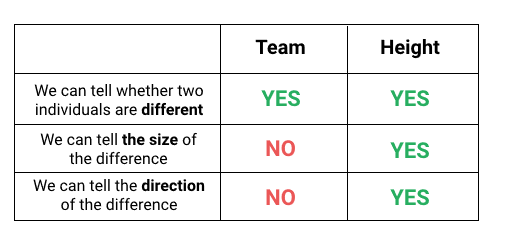
The system of rules that define how each variable is measured is called scale of measurement.
A **system of measurement** is made up of four different scales of measurement: nominal, ordinal, interval and ratio. The characteristics of each scale pivot around three main questions:
- Can we tell whether two individuals are different?
- Can we tell the direction of the difference?
- Can we tell the size of the difference?

## The Nominal Scale

In [73]:
wnba['Team'].unique()

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

The `Team` variable is an example of a variable measured on a **nominal scale**. For any variable measured on a nominal scale:
- We can tell whether two individuals are different or not (w.r.t that variable)
- We can't say anything about the direction and the size of the difference
- We know that it can only describe qualities
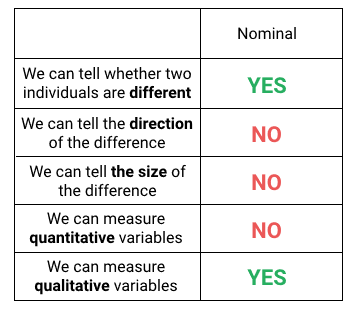

## The Ordinal Scale
If we add a new `height label` variable: 'short', 'medium' or 'tall'. In this case, not only we can tell whether two individuals are different but also tell the **direction** of the difference. 
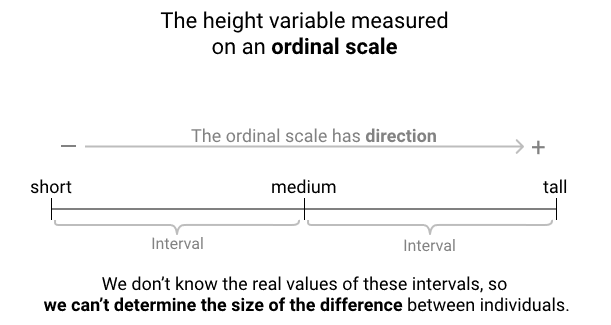

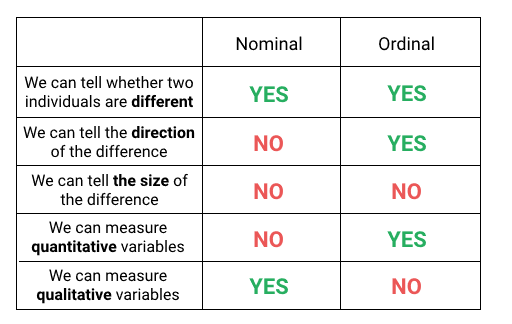
Variables measured on an ordinal scale can **only be quantitative**. 
- Common examples of variables measured on ordinal scales : ranks of ahtletes, people in competition
- Other examples include measurement of subjetive evaluations that are generally difficult or near to impossible to quantify with precision. 

## The Interval and Ratio Scales
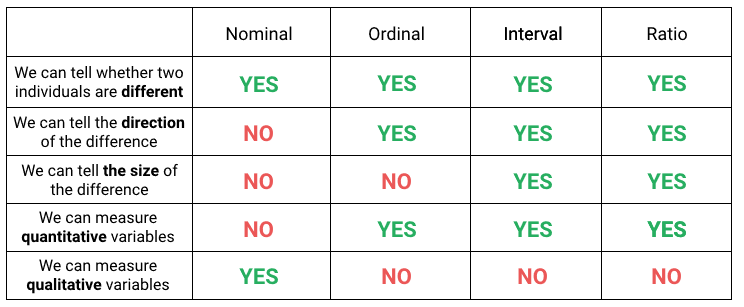

The **key difference** of ratio scales and interval scales is the **nature of the zero point**.
On a ratio scale, the zero point means no quantity. For example, `weight` variable is measured on a ratio scale, which means that 0 grams indicate the absence of weight. 
On an interval scale, 0 does not indicate absence of a quantity. 

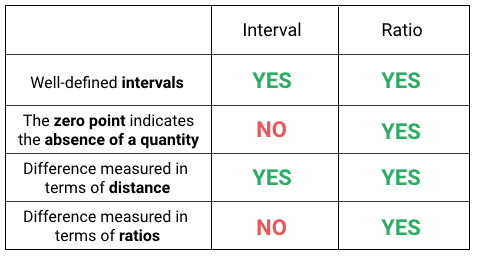

# Frequency Distribution
Analyze data for different purposes:
- To describe phenomena in the world (science)
- To make better decisions (industries)
- To improve systems (engineering)
- To describe different aspect of our society (data journalism)
Our capacity to understand a data set by looking at it in a table format is limited, and it decreaes dramatically 

In [74]:
wnba['Pos'].value_counts()

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64

Notice that by default, the frequencies are sorted in the descending order. This is fine for nominal scale because there is no direction. The default can help us to see immediately which values have the greatest or lowest frequencies and make comparison easier. <br>
However, for variables measured on ordinal, interval or ratio scales, this default makes the analysis more difficult because the uniqie values have direction.

In [75]:
wnba['Height'].value_counts()

188    20
193    18
175    16
185    15
191    11
183    11
173    11
196     9
178     8
180     7
170     6
198     5
201     2
168     2
206     1
165     1
Name: Height, dtype: int64

Because the `Height` variable has direction, we might be interested to find:
- How many players are under 170cm?
- How many players are very tall (over 185)?
- Are there any players below 160 cm?

In [76]:
wnba['Height'].value_counts().sort_index(ascending=False)

206     1
201     2
198     5
196     9
193    18
191    11
188    20
185    15
183    11
180     7
178     8
175    16
173    11
170     6
168     2
165     1
Name: Height, dtype: int64

In [84]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'

In [85]:
wnba['PTS_ordinal_scale']=wnba.apply(make_pts_ordinal,axis=1)

In [86]:
wnba['PTS_ordinal_scale'].value_counts()

average number of points    45
few points                  27
many, but below average     25
more than average           21
much more than average      13
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [89]:
wnba['PTS_ordinal_scale'].value_counts().sort_values()

very few points             12
much more than average      13
more than average           21
many, but below average     25
few points                  27
average number of points    45
Name: PTS_ordinal_scale, dtype: int64

In [87]:
wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

## Proportions and Percentage

In [90]:
wnba['Pos'].value_counts()/len(wnba)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

In [91]:
wnba['Pos'].value_counts(normalize=True)

G      0.419580
F      0.230769
C      0.174825
G/F    0.090909
F/C    0.083916
Name: Pos, dtype: float64

In [93]:
age_per=wnba['Age'].value_counts(normalize = True).sort_index() * 100

In [94]:
#what proportion of players are 25 years old?
age_per[25]/100

0.1048951048951049

In [95]:
#what percentage of players are 30 years or older?
age_per.loc[30:].sum()

26.573426573426573

In [97]:
age_per.loc[:23].sum()

18.88111888111888

## Percentiles and Percentile Rank
In above example, we know that the percentage of palyers younger than 23 years old is 18.881%, this is also called **percentile rank**.

In [98]:
#use scipy.stats 
from scipy.stats import percentileofscore
percentileofscore(a=wnba['Age'],score=23, kind='weak')

18.88111888111888

In [99]:
?percentileofscore

In [101]:
# percentage of players above 30 years old
#note that score now =29
100 - percentileofscore(a=wnba['Age'],score=29,kind='weak')

26.573426573426573

In [102]:
100 - percentileofscore(a=wnba['Age'],score=30,kind='strict')

26.573426573426573

Answer the following questions:
- What percentage of players played half the number of games or less in the 2016-2017 season (there are 34 games in the WNBA’s regular season)? 
- What percentage of players played more than half the number of games of the season 2016-2017?

In [103]:
percentileofscore(a=wnba['Games Played'],score=17,kind='weak')

16.083916083916083

### Finding Percentiles with Pandas

In [104]:
wnba['Age'].describe()

count    143.000000
mean      27.076923
std        3.679170
min       21.000000
25%       24.000000
50%       27.000000
75%       30.000000
max       36.000000
Name: Age, dtype: float64

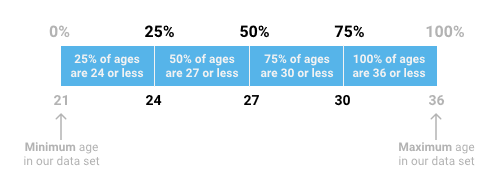

    The first quartile (also called lower quartile) is 24 (note that 24 is also the 25th percentile).
    The second quartile (also called the middle quartile) is 27 (note that 27 is also the 50th percentile).
    And the third quartile (also called the upper quartile) is 30 (note that 30 is also the 75th percentile).


In [105]:
wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:]

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64

## Grouped Frequency Distribution Tables

In [108]:
wnba['Weight'].value_counts().sort_index().iloc[:10]

55.0    1
57.0    1
58.0    1
59.0    2
62.0    1
63.0    3
64.0    5
65.0    4
66.0    8
67.0    1
Name: Weight, dtype: int64

Frequency table such as above exmaple can be difficult to read as there is a lot of granularity in the table above. If the variable is measured on an interval or ratio scale, a common solution to this problem is to *group* the values in equal intervals. For `weight` variable, the values range from 55 to 113 kg, which amounts to a difference of 58 kg. We can try to segment this 58 kg interval in ten similar and equal intervals. 
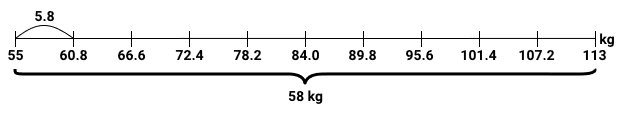

In [109]:
wnba['Weight'].value_counts(bins=10).sort_index()

(54.941, 60.8]     5
(60.8, 66.6]      21
(66.6, 72.4]      10
(72.4, 78.2]      33
(78.2, 84.0]      31
(84.0, 89.8]      24
(89.8, 95.6]      10
(95.6, 101.4]      3
(101.4, 107.2]     2
(107.2, 113.0]     3
Name: Weight, dtype: int64

Using the grouped frequency distribution table, the following patterns can be found:
- Most players weigh somewhere between 70 and 90 kg
- Very few players weigh over 100 kg
- Very few players weigh under 60 kg

## Information Loss

In [110]:
#example on PTS
wnba['PTS'].value_counts(bins=10).sort_index()

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64

As seen from above freqneucy distribution table, because we grouped the values, we lost more granular information such as :
- How many players, if any, scored **exactly** 50 points
- How many players scored udner 10 points
- How many players scored between 20 and 30 points
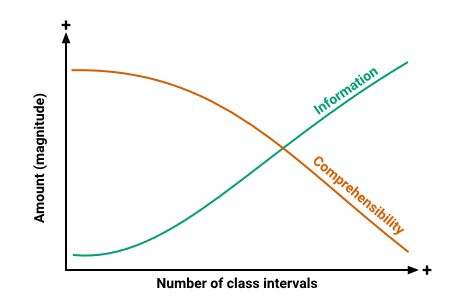

Generate a grouped frequency distribution for the MIN variable (minutes played during the season), and experiment with the number of class intervals to get a sense for what conclusions you can draw as you vary the number of class intervals. Try to experiment with different numbers of class intervals:

In [111]:
for bin_size in [1,2,3,5,10,15,20,40]:
    print (wnba['MIN'].value_counts(bins=bin_size).sort_index())
    print ('+++++++++++++++++++++')

(10.993, 1018.0]    143
Name: MIN, dtype: int64
+++++++++++++++++++++
(10.993, 515.0]    74
(515.0, 1018.0]    69
Name: MIN, dtype: int64
+++++++++++++++++++++
(10.993, 347.333]     48
(347.333, 682.667]    50
(682.667, 1018.0]     45
Name: MIN, dtype: int64
+++++++++++++++++++++
(10.993, 213.2]    29
(213.2, 414.4]     32
(414.4, 615.6]     25
(615.6, 816.8]     29
(816.8, 1018.0]    28
Name: MIN, dtype: int64
+++++++++++++++++++++
(10.993, 112.6]    19
(112.6, 213.2]     10
(213.2, 313.8]     17
(313.8, 414.4]     15
(414.4, 515.0]     13
(515.0, 615.6]     12
(615.6, 716.2]     15
(716.2, 816.8]     14
(816.8, 917.4]     19
(917.4, 1018.0]     9
Name: MIN, dtype: int64
+++++++++++++++++++++
(10.993, 79.067]      14
(79.067, 146.133]     11
(146.133, 213.2]       4
(213.2, 280.267]      13
(280.267, 347.333]     6
(347.333, 414.4]      13
(414.4, 481.467]       8
(481.467, 548.533]     8
(548.533, 615.6]       9
(615.6, 682.667]      12
(682.667, 749.733]     9
(749.733, 816.8]      

## Readability for Grouped Frequency Tables

In [112]:
wnba['PTS'].value_counts(bins=5).sort_index()

(1.417, 118.4]    54
(118.4, 234.8]    37
(234.8, 351.2]    25
(351.2, 467.6]    18
(467.6, 584.0]     9
Name: PTS, dtype: int64

magine we'd have to publish the table above in a blog post or a scientific paper. The readers will have a hard time understanding the intervals we chose. They'll also be puzzled by the decimal numbers because points in basketball can only be integers.

To fix this, we can define the intervals ourselves. For the table above, we can define six intervals of 100 points each, and then count how many values fit in each interval.

In [114]:
intervals = pd.interval_range(start=0,end=600,freq=100)
intervals

IntervalIndex([(0, 100], (100, 200], (200, 300], (300, 400], (400, 500], (500, 600]]
              closed='right',
              dtype='interval[int64]')

In [115]:
gr_freq_table=pd.Series([0,0,0,0,0,0],index=intervals)
gr_freq_table

(0, 100]      0
(100, 200]    0
(200, 300]    0
(300, 400]    0
(400, 500]    0
(500, 600]    0
dtype: int64

In [116]:
for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table.loc[interval]+=1
            break

In [117]:
gr_freq_table

(0, 100]      49
(100, 200]    28
(200, 300]    32
(300, 400]    17
(400, 500]    10
(500, 600]     7
dtype: int64

In [118]:
#sanity check
gr_freq_table.sum()

143

## Visualizing Frequency Distributions
## Bar Plots

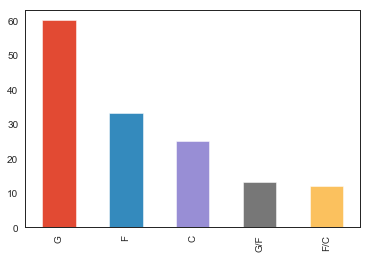

In [119]:
wnba['Pos'].value_counts().plot.bar()

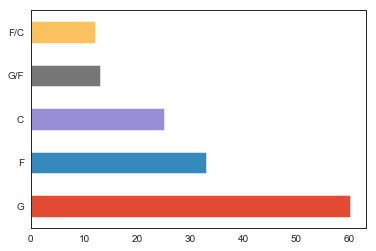

In [120]:
#horizontal bar plots are ideal when labels are long
wnba['Pos'].value_counts().plot.barh()

In [126]:
def map_exp(x):
    if x['Experience'] <1:
        return 'Rookie'
    elif x['Experience'] <=3:
        return 'Little Experience'
    elif x['Experience']<=5:
        return 'Experienced'
    elif x['Experience']<=10:
        return 'Very Experienced'
    else:
        return 'Veteran'

In [139]:
wnba['Experience']=pd.to_numeric(wnba['Experience'],errors='coerce')

In [146]:
wnba['Experience'].fillna(5,inplace=True)

In [147]:
wnba['Experience_ord']=wnba.apply(map_exp,axis=1)

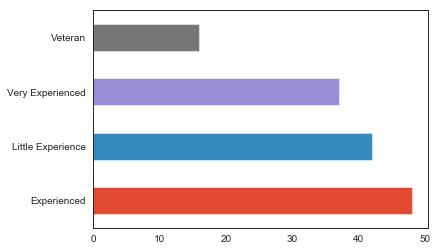

In [148]:
wnba['Experience_ord'].value_counts().plot.barh()

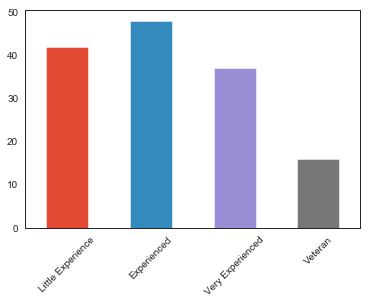

In [152]:
wnba['Experience_ord'].value_counts().iloc[[1,0,2,3]].plot.bar(rot=45)

## Histograms

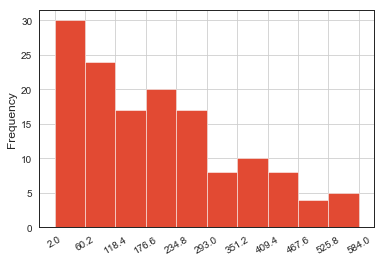

In [155]:
wnba['PTS'].plot.hist(grid=True,xticks=np.arange(2,585,58.2),rot=30)

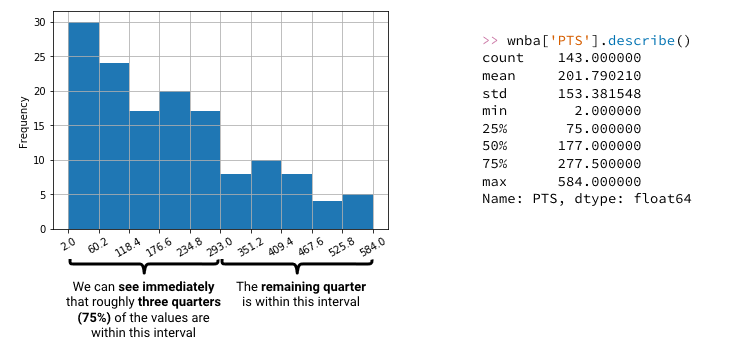
We can immediately see the same two patterns on the histogram above:

    The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
    Most values (roughly three quarters) are clustered in the left half of the histogram.


Below is the summary what we learnt so far:
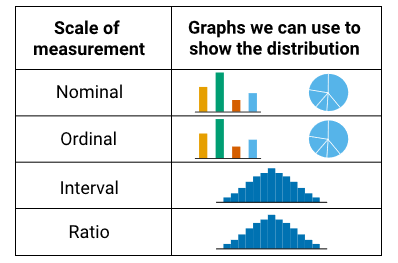

### Binning for Histogram
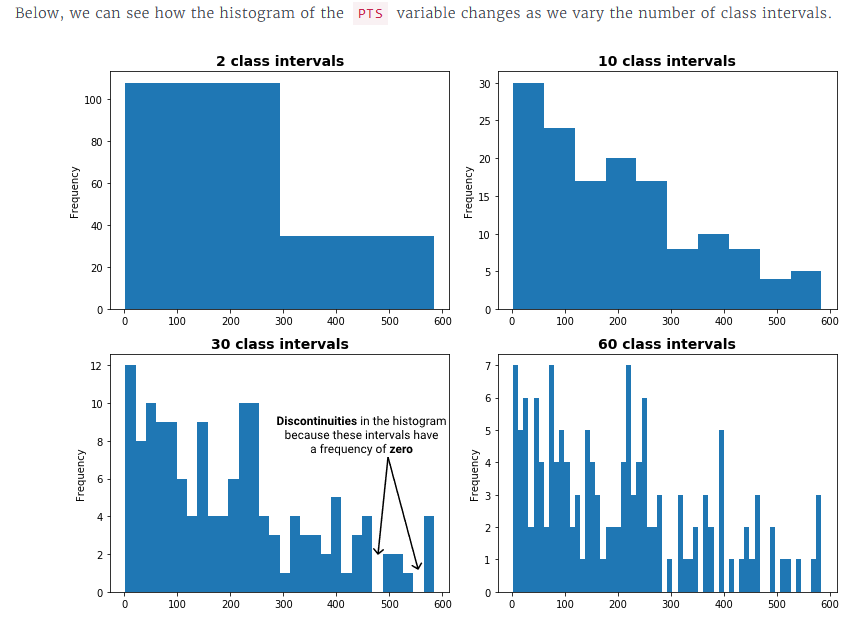

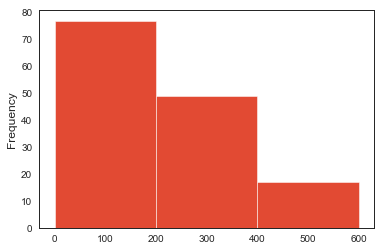

In [158]:
wnba['PTS'].plot.hist(range=(1,600),bins=3)

## Skewed Distribution

Text(0.5, 0, 'Games played')

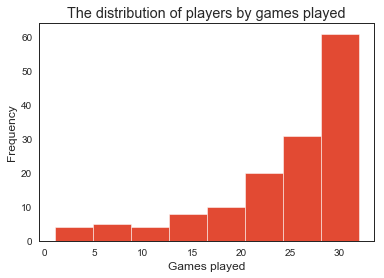

In [160]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8,
                               title = 'The distribution of players by games played')
plt.xlabel('Games played')

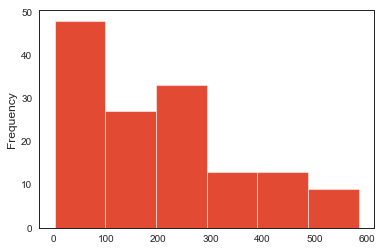

In [161]:
wnba['PTS'].plot.hist(bins=6)

Both these histograms show skewed distributions. In a skewed distribution:

- The values pile up toward the end or the starting point of the range, making up the body of the distribution.
- Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.
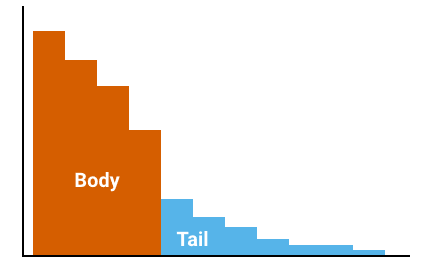

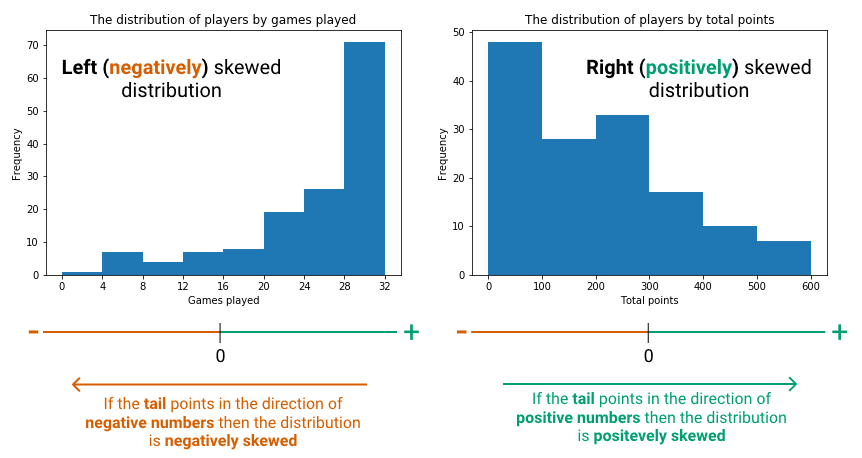

# Comparing Frequency Distribution

## Grouped Bar Plots

In [179]:
import seaborn as sns

In [180]:
wnba.head(1)

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,AST,STL,BLK,TO,PTS,DD2,TD3,Pts_per_game,PTS_ordinal_scale,Experience_ord
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,12,3,6,12,93,0,0,11.625,"many, but below average",Little Experience


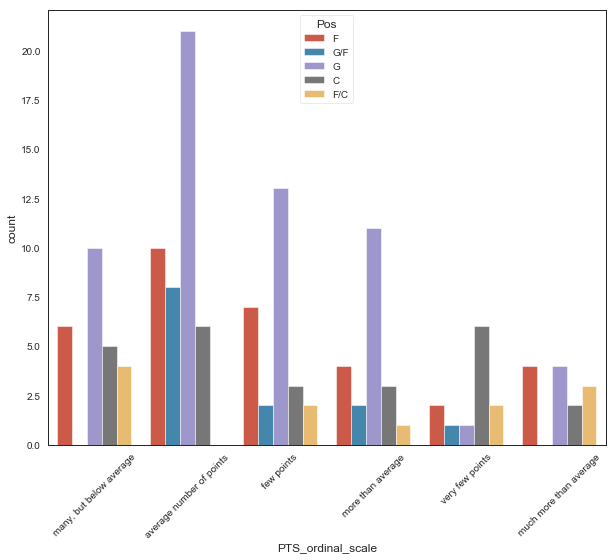

In [191]:
fig=plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(x='PTS_ordinal_scale',hue='Pos',data=wnba)

## Do Older Players Play Less?

In [192]:
min_mean=wnba['MIN'].mean()

In [193]:
age_mean=wnba['Age'].mean()

In [201]:
wnba['age_ord'] = wnba['Age'].apply(lambda x: 'old' if x>=age_mean else 'young')
wnba['min_ord'] = wnba['MIN'].apply(lambda x: 'average or above' if x>= min_mean else 'below average')

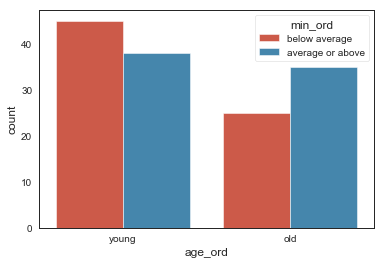

In [206]:
sns.countplot(x='age_ord',hue='min_ord',data=wnba)

## Comparing Histograms

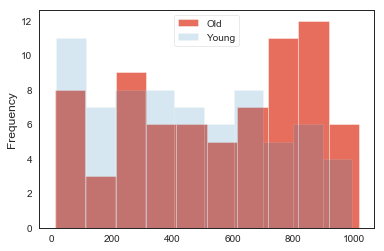

In [214]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True,alpha=0.8)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True,alpha=0.2)

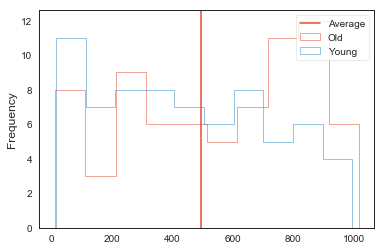

In [216]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(x=497,label='Average')
plt.legend()

## Kernal Density Estimate Plots

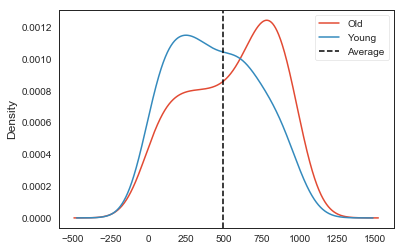

In [220]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497,label='Average',c='k',ls='--')
plt.legend()

## Drabacks of Kernal Density Plots

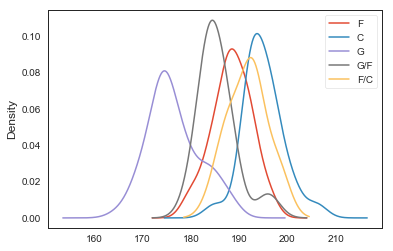

In [221]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

E.g We want to analyze the distirbution of player height as a function of player position. In other words, we want to figure out whether centers are generally taller than forwards, whether forwards are generally shorter than guards. 

## Strip Plots
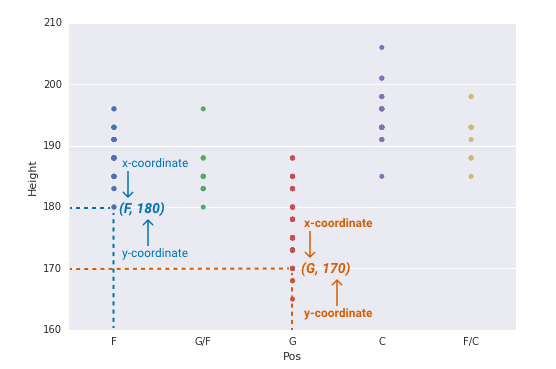

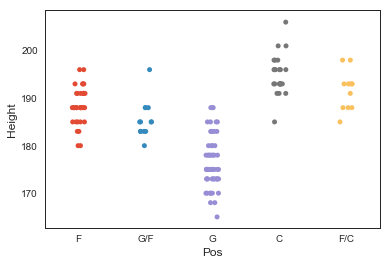

In [222]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

On a side note, you might have noticed that strip plots are similar to the scatter plots we learned about in the visualization courses. In fact, strip plots are actually scatter plots. When one of the variables is nominal or ordinal, a scatter plot will generally take the form of a series of narrow strips (the number of narrow strips will be the same as the number of unique values in the nominal or ordinal variable).

## Box Plots
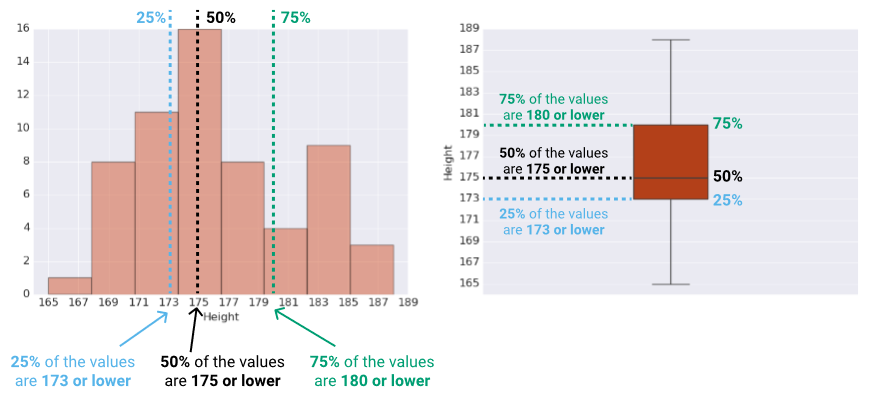

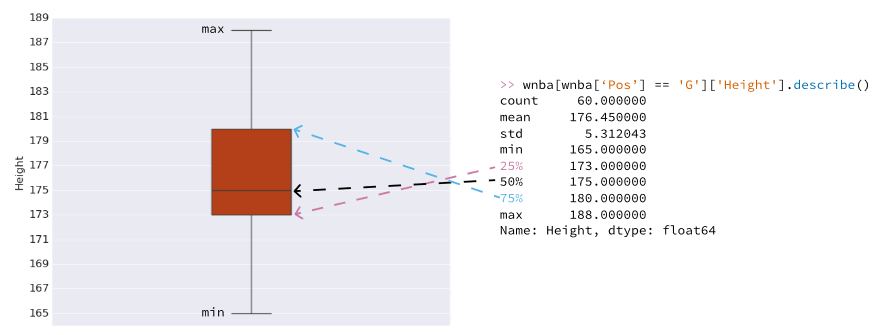

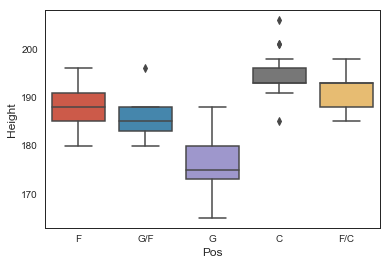

In [223]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

In summary:
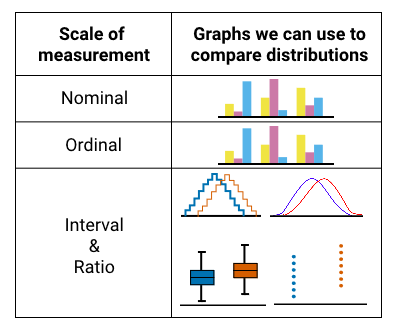